<h2>Clustering: Food Retailer<h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data
X = pd.read_csv("fr_data_final.csv")
X

,Channel=1,Region=North,Region=South,Fresh,MeatAndFish,Wine,Frozen,PersonalCare,Deli,AssortmentExtDegree
0,0.0,1.0,0.0,0.077621,0.048732,0.065717,0.038196,0.051930,0.107092,0.50
1,0.0,1.0,0.0,0.073608,0.031167,0.023109,0.063622,0.006442,0.013183,0.75
2,1.0,1.0,0.0,0.396467,0.738042,0.598942,0.127490,0.592005,0.134793,0.50
3,0.0,1.0,0.0,0.001222,0.119712,0.041174,0.001923,0.025941,0.000000,0.00
4,1.0,0.0,0.0,0.149980,0.011887,0.029533,0.189567,0.008059,0.072653,0.25
...,...,...,...,...,...,...,...,...,...,...
435,0.0,1.0,0.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,0.75
436,1.0,1.0,0.0,0.076568,0.040712,0.084622,0.001167,0.100235,0.004631,1.00
437,1.0,1.0,0.0,0.189161,0.083779,0.161452,0.050457,0.164217,0.012495,0.00
438,0.0,1.0,0.0,0.223481,0.067467,0.054141,0.160755,0.026675,0.019962,0.25


<h3>K-means Clustering (Scikit-Learn)</h3>

<b>Select the number of clusters through SSE (elbow method)</b>

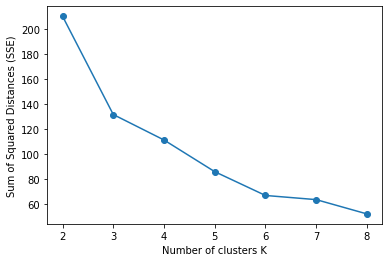

In [2]:
from sklearn.cluster import KMeans

# Select the number of clusters by means of SSE
SSE = []
range_n_clusters = range(2,9)
for nclust in range_n_clusters:
    # Initialize K-means clustering
    km = KMeans(n_clusters=nclust, 
                init='random', # or 'k-means++'
                n_init=10, 
                max_iter=100, 
                random_state=0)
    # Generate K-means clustering
    km.fit(X)
    SSE.append(km.inertia_)
    
plt.plot(range_n_clusters, SSE, marker='o')
plt.xlabel('Number of clusters K')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.show()

<b>Select the number of clusters through silhouette-based method</b>

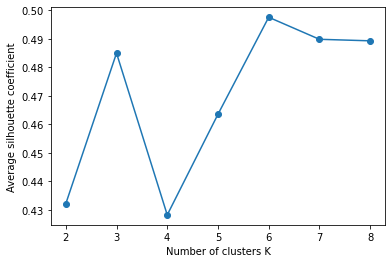

In [3]:
from sklearn.metrics import silhouette_samples, silhouette_score

sil=[]
range_n_clusters = range(2,9)
for nclust in range_n_clusters:
    # Initialize K-means clustering
    km = KMeans(n_clusters=nclust, 
                init='random', # or 'k-means++'
                n_init=10, 
                max_iter=100, 
                random_state=0)
    # Generate K-means clustering
    cluster_labels = km.fit_predict(X)
    # Compute the average silhouette coefficient
    silhouette_avg_coeff = silhouette_score(X, cluster_labels)
    sil.append(silhouette_avg_coeff)
    
plt.plot(range_n_clusters, sil, marker='o')
plt.xlabel('Number of clusters K')
plt.ylabel('Average silhouette coefficient')
plt.show()

<b>Display the silhouette plot</b>

N° of clusters = 2 -> Average silhouette coefficient:  0.4321675019735054
N° of clusters = 3 -> Average silhouette coefficient:  0.4849951603286238
N° of clusters = 4 -> Average silhouette coefficient:  0.4282377039618671
N° of clusters = 5 -> Average silhouette coefficient:  0.46355012198474205
N° of clusters = 6 -> Average silhouette coefficient:  0.49758416847852305
N° of clusters = 7 -> Average silhouette coefficient:  0.48984757177632604
N° of clusters = 8 -> Average silhouette coefficient:  0.48931224718662375


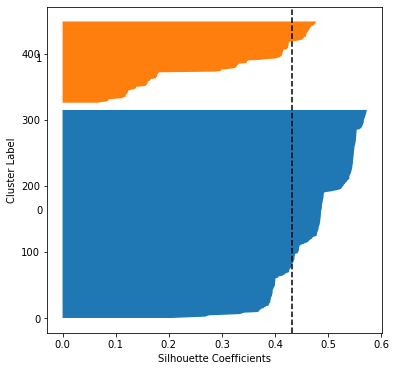

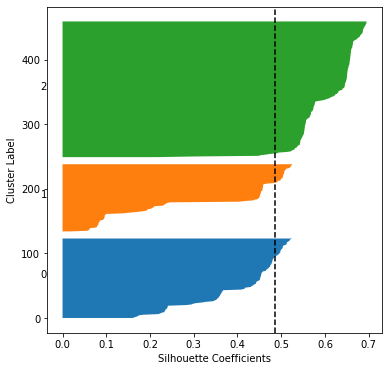

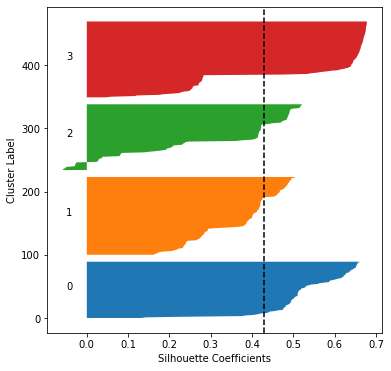

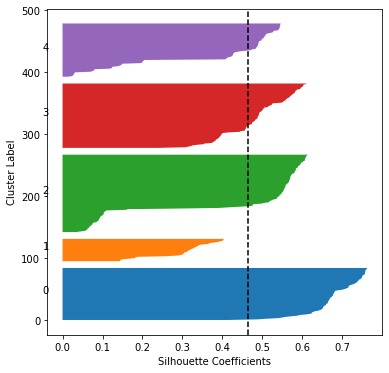

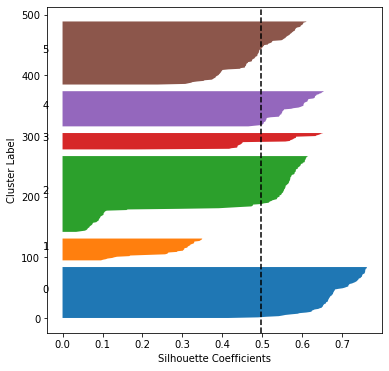

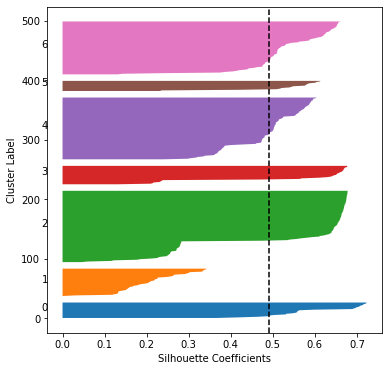

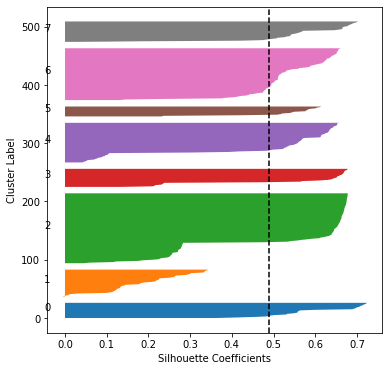

In [4]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Select the number of clusters by means of the silohuette coefficient
range_n_clusters = range(2,9)
for nclust in range_n_clusters:
    
    # Initialize K-means clustering
    km = KMeans(n_clusters=nclust,
                init='random',
                n_init=10, 
                max_iter=100,
                random_state=0)
    
    # Generate K-means clustering, compute cluster centers and predict the cluster label for each example
    cluster_labels = km.fit_predict(X)
    cluster_labels_set = np.unique(cluster_labels)
    
    # Compute the average silhouette coefficient
    silhouette_avg_coeff = silhouette_score(X, cluster_labels)
    print("N° of clusters =", nclust, "-> Average silhouette coefficient: ", silhouette_avg_coeff)
    
    # Compute the silhouette coefficient for each example
    silhouette_example_coeff = silhouette_samples(X, cluster_labels)
    
    # For the examples belonging to each cluster plot the silhouette coefficient
    fig = plt.figure(nclust) 
    fig.set_size_inches(6,6)
    ax1 = fig.add_subplot()
    
    y_lower = 0
    for i in cluster_labels_set:
        # Aggregate and sort the silhouette coefficients for the examples belonging to the cluster
        cluster_i_silhouette_coeff = silhouette_example_coeff[cluster_labels==i]
        cluster_i_silhouette_coeff.sort()
        y_upper = y_lower + cluster_i_silhouette_coeff.shape[0]
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_i_silhouette_coeff)
        ax1.text(-0.05, y_lower + 0.5 * cluster_i_silhouette_coeff.shape[0], str(i))
        y_lower = y_upper + 10
    
    # Enrich the silhouette plot
    ax1.axvline(x=silhouette_avg_coeff, color="black", linestyle="--")
    ax1.set_xlabel("Silhouette Coefficients")
    ax1.set_ylabel("Cluster Label")

<b>Generate the clustering model by K-means</b>

In [5]:
# Generate the final K-means clustering model
km = KMeans(n_clusters=3,
            init='random',
            n_init=10, 
            max_iter=100,
            random_state=0)
cluster_labels = km.fit_predict(X)
X['Cluster_Label'] = cluster_labels
X

,Channel=1,Region=North,Region=South,Fresh,MeatAndFish,Wine,Frozen,PersonalCare,Deli,AssortmentExtDegree,Cluster_Label
0,0.0,1.0,0.0,0.077621,0.048732,0.065717,0.038196,0.051930,0.107092,0.50,2
1,0.0,1.0,0.0,0.073608,0.031167,0.023109,0.063622,0.006442,0.013183,0.75,2
2,1.0,1.0,0.0,0.396467,0.738042,0.598942,0.127490,0.592005,0.134793,0.50,0
3,0.0,1.0,0.0,0.001222,0.119712,0.041174,0.001923,0.025941,0.000000,0.00,2
4,1.0,0.0,0.0,0.149980,0.011887,0.029533,0.189567,0.008059,0.072653,0.25,0
...,...,...,...,...,...,...,...,...,...,...,...
435,0.0,1.0,0.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,0.75,2
436,1.0,1.0,0.0,0.076568,0.040712,0.084622,0.001167,0.100235,0.004631,1.00,0
437,1.0,1.0,0.0,0.189161,0.083779,0.161452,0.050457,0.164217,0.012495,0.00,0
438,0.0,1.0,0.0,0.223481,0.067467,0.054141,0.160755,0.026675,0.019962,0.25,2


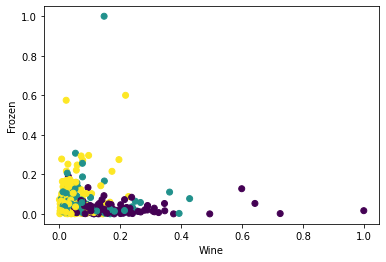

In [6]:
plt.scatter(X.values[:,5],X.values[:,6],c=cluster_labels)
plt.xlabel("Wine")
plt.ylabel("Frozen")
plt.show()

<b>Agglomerative Hierarchical Clustering (SciPy and Scikit-Learn)</b>

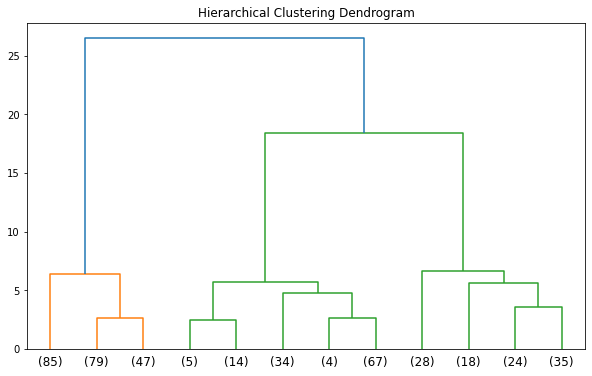

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute the linkage matrix
linkage_matrix = linkage(X, metric='euclidean', method='ward')

plt.figure(figsize=(10,6))
plt.title('Hierarchical Clustering Dendrogram')
# Show only the last p merged clusters in the dendogram
dendrogram(linkage_matrix, truncate_mode='lastp', p=12)
plt.show()

In [8]:
# Get the clusters
from scipy.cluster.hierarchy import fcluster
num_clusters = 3
clusters = fcluster(linkage_matrix, num_clusters)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

<b>...What is the linkage matrix? </b>

In [9]:
X_subsample = X.head(5)
X_subsample

,Channel=1,Region=North,Region=South,Fresh,MeatAndFish,Wine,Frozen,PersonalCare,Deli,AssortmentExtDegree,Cluster_Label
0,0.0,1.0,0.0,0.077621,0.048732,0.065717,0.038196,0.051930,0.107092,0.50,2
1,0.0,1.0,0.0,0.073608,0.031167,0.023109,0.063622,0.006442,0.013183,0.75,2
2,1.0,1.0,0.0,0.396467,0.738042,0.598942,0.127490,0.592005,0.134793,0.50,0
3,0.0,1.0,0.0,0.001222,0.119712,0.041174,0.001923,0.025941,0.000000,0.00,2
4,1.0,0.0,0.0,0.149980,0.011887,0.029533,0.189567,0.008059,0.072653,0.25,0


In [10]:
linkage_matrix = linkage(X_subsample, metric='euclidean', method='ward')
linkage_matrix

array([[0.        , 1.        , 0.27599737, 2.        ],
       [3.        , 5.        , 0.73806823, 3.        ],
       [2.        , 4.        , 1.52429991, 2.        ],
       [6.        , 7.        , 3.65395373, 5.        ]])

In [11]:
linkage_matrix_df = pd.DataFrame(linkage_matrix, columns = ['N° cluster (or point)','N° cluster (or point)','Distance', 'Cluster Size'])
linkage_matrix_df

,N° cluster (or point),N° cluster (or point),Distance,Cluster Size
0,0.0,1.0,0.275997,2.0
1,3.0,5.0,0.738068,3.0
2,2.0,4.0,1.524300,2.0
3,6.0,7.0,3.653954,5.0


In [12]:
from sklearn.cluster import AgglomerativeClustering

# Initialize the hierarchical clustering algorithm
# affinity -> 'euclidean', 'manhattan', 'cosine' or 'precomputed' (similarity matrix)
# linkage -> ‘ward’ (default), ‘complete’, ‘average’, ‘single’
hc = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=3)
# Generate hierarchical clustering and predict the cluster label for each example
cluster_labels = hc.fit_predict(X)
X['Cluster_Label'] = cluster_labels
X

,Channel=1,Region=North,Region=South,Fresh,MeatAndFish,Wine,Frozen,PersonalCare,Deli,AssortmentExtDegree,Cluster_Label
0,0.0,1.0,0.0,0.077621,0.048732,0.065717,0.038196,0.051930,0.107092,0.50,1
1,0.0,1.0,0.0,0.073608,0.031167,0.023109,0.063622,0.006442,0.013183,0.75,1
2,1.0,1.0,0.0,0.396467,0.738042,0.598942,0.127490,0.592005,0.134793,0.50,2
3,0.0,1.0,0.0,0.001222,0.119712,0.041174,0.001923,0.025941,0.000000,0.00,1
4,1.0,0.0,0.0,0.149980,0.011887,0.029533,0.189567,0.008059,0.072653,0.25,2
...,...,...,...,...,...,...,...,...,...,...,...
435,0.0,1.0,0.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,0.75,1
436,1.0,1.0,0.0,0.076568,0.040712,0.084622,0.001167,0.100235,0.004631,1.00,2
437,1.0,1.0,0.0,0.189161,0.083779,0.161452,0.050457,0.164217,0.012495,0.00,2
438,0.0,1.0,0.0,0.223481,0.067467,0.054141,0.160755,0.026675,0.019962,0.25,1


<b>Density-Based Clustering -> DBSCAN (Scikit-Learn)</b>

In [13]:
from sklearn.cluster import DBSCAN

# Initialize the density-based clustering algorithm
# From scikit-learn: [‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’]
# From scipy.spatial.distance [‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘correlation’, ‘dice’, ‘hamming’, ‘jaccard’, ‘kulsinski’, 
# ‘mahalanobis’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, 
#‘sokalsneath’, ‘sqeuclidean’, ‘yule’]
dbs = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
# Generate density-based clustering and predict the cluster label for each example
cluster_labels = dbs.fit_predict(X)
X['Cluster_Label'] = cluster_labels
X

,Channel=1,Region=North,Region=South,Fresh,MeatAndFish,Wine,Frozen,PersonalCare,Deli,AssortmentExtDegree,Cluster_Label
0,0.0,1.0,0.0,0.077621,0.048732,0.065717,0.038196,0.051930,0.107092,0.50,0
1,0.0,1.0,0.0,0.073608,0.031167,0.023109,0.063622,0.006442,0.013183,0.75,0
2,1.0,1.0,0.0,0.396467,0.738042,0.598942,0.127490,0.592005,0.134793,0.50,-1
3,0.0,1.0,0.0,0.001222,0.119712,0.041174,0.001923,0.025941,0.000000,0.00,0
4,1.0,0.0,0.0,0.149980,0.011887,0.029533,0.189567,0.008059,0.072653,0.25,1
...,...,...,...,...,...,...,...,...,...,...,...
435,0.0,1.0,0.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,0.75,0
436,1.0,1.0,0.0,0.076568,0.040712,0.084622,0.001167,0.100235,0.004631,1.00,4
437,1.0,1.0,0.0,0.189161,0.083779,0.161452,0.050457,0.164217,0.012495,0.00,4
438,0.0,1.0,0.0,0.223481,0.067467,0.054141,0.160755,0.026675,0.019962,0.25,0


In [14]:
cluster_labels

array([ 0,  0, -1,  0,  1,  0,  0,  0,  0,  0,  2,  0,  2,  3,  0,  0,  4,
        5,  0,  0,  0,  3,  2,  0,  6,  4,  4,  0,  0,  0,  2,  0,  0,  0,
        4,  4,  5,  2,  4,  0,  4,  2,  2,  0,  2,  0,  2,  3,  6,  0,  4,
        0,  0,  0,  4,  4,  0,  0,  0,  4,  4,  0,  0,  0,  0,  2,  0,  0,
        2,  2,  4,  4,  6,  0,  0,  4,  0,  0,  4,  4,  0,  2,  4,  0,  0,
        4,  0,  0,  2,  0,  2,  0,  4,  0,  4,  0,  0,  4,  0,  0,  4,  0,
        2,  0,  0,  0,  0,  0,  3,  4,  0,  0,  0,  3,  0,  0,  0,  4,  0,
        4,  3,  3,  2,  0,  0,  0,  2,  3,  4,  0,  5,  0,  4,  0,  0,  4,
        0,  6,  4,  4,  5,  0,  4,  4,  0,  0,  0,  5,  0,  4,  0,  4,  3,
        2,  2,  0,  0,  0,  4,  0,  2,  0,  0,  5,  0,  1,  0,  4,  3, -1,
        0,  2,  2,  0,  2,  0,  0,  0,  5,  6,  2,  0,  0,  4,  0,  0,  4,
        2, -1,  3,  0,  4,  0,  0,  4,  0,  0,  0,  6,  2,  0,  0,  4,  0,
        0,  0,  0,  0,  0,  2, -1,  0,  0,  4,  4,  1,  0,  4,  3,  6,  0,
        3,  2,  0,  0,  0